In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
import psycopg2
try:
    connection = psycopg2.connect(user = "postgres",
                                  password = "password",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "dvdrental")

    cursor = connection.cursor()
    # Print PostgreSQL Connection properties
    print ( connection.get_dsn_parameters(),"\n")

    # Print PostgreSQL version
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("You are connected to - ", record,"\n")

except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
# finally:
#     #closing database connection.
#         if(connection):
#             cursor.close()
#             connection.close()
#             print("PostgreSQL connection is closed")

{'user': 'postgres', 'dbname': 'dvdrental', 'host': '127.0.0.1', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 13.2, compiled by Visual C++ build 1914, 64-bit',) 



<h1>Which category does have most movies?</h1>
<p> We need to check category of movie so that we can know how much stock we have in each category

In [65]:
query1 = '''with t1 as (select name,count(name) as count  from category c
join film_category fc
on c.category_id=fc.category_id
group by 1
order by 2 desc
limit 1),
t2 as (select max(count) max from t1)

select name,count(rental_id) from category c
join film_category fc
on c.category_id=fc.category_id
join film f
on f.film_id=fc.film_id
join inventory i
on i.film_id=f.film_id
join rental r
on r.inventory_id=i.inventory_id 
group by 1
having count(rental_id)>(select max from t2)
order by 2 desc
'''

In [5]:
result = cursor.fetchall()

In [67]:
query_1 =pd.read_sql_query(query1,connection)
query_1

,name,count
0,Sports,1179
1,Animation,1166
2,Action,1112
3,Sci-Fi,1101
4,Family,1096
5,Drama,1060
6,Documentary,1050
7,Foreign,1033
8,Games,969
9,Children,945


In [10]:
# k.head(n=10)
# k.info()
query_1.describe()

,count
count,16.00000
mean,1002.75000
std,113.31343
min,830.00000
25%,939.75000
50%,1001.00000
75%,1097.25000
max,1179.00000


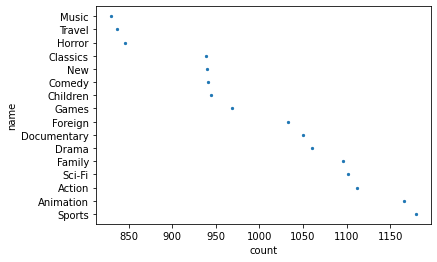

In [68]:
# %matplotlib inline
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# pd.read_sql_query(query1, connection).hist(ax=ax)
plt.scatter(x=query_1['count'],y=query_1['name'],s = 5)
plt.xlabel('count')
plt.ylabel('name')
plt.show()

<h1>Total sales of top 10 after next 10 countries. We offer discount the ceratain days in this areas
through ads</h1>
<p> A discount can be a great way to encourage customers to purchase in the event that competitors
are offering a similar product or service at a higher price, or can be an incentive for them to pay faster,
or support repeat business

In [33]:
query2 = '''select country,cast(sum(amount) as money) as total_sales
from country
join city
using(country_id)
join address
using(city_id)
join customer
using (address_id)
join payment
using(customer_id)
group by 1
order by 2 desc
offset 10 rows
fetch first 10 row only;'''

In [37]:
query_2=pd.read_sql_query(query2,connection)
query_2

,country,total_sales
0,Nigeria,"$1,314.92"
1,Argentina,"$1,298.80"
2,Taiwan,"$1,155.10"
3,South Africa,"$1,069.46"
4,Iran,$877.96
5,United Kingdom,$850.96
6,Poland,$786.16
7,Italy,$753.26
8,Germany,$741.24
9,Vietnam,$676.45


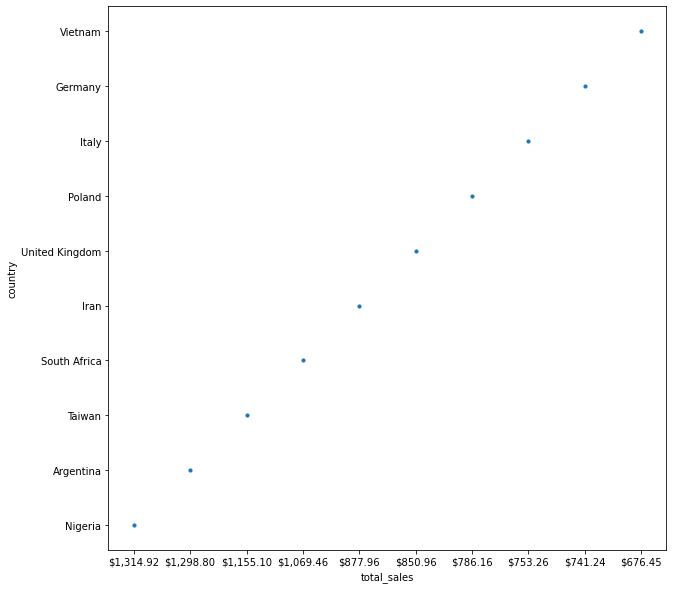

In [41]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x=query_2['total_sales'],y=query_2['country'],s = 10)
plt.xlabel('total_sales')
plt.ylabel('country')
plt.show()

<h1>Email addresses of top 10 customers as reward of one free movie</h1>
<p> It’s a really good way to show appreciation to customers.This feature attract to customers and customer will want to
be lucky to get gifts.

In [45]:
query3 = '''create view  top_10 as (select first_name||' '||last_name as name,email,cast(sum(amount) as money) as sales

from customer
join payment
using(customer_id)
group by 1,2
order by 3 desc
limit 10);
select email from top_10'''

In [46]:
query_3 = pd.read_sql_query(query3,connection)
query_3

,email
0,eleanor.hunt@sakilacustomer.org
1,karl.seal@sakilacustomer.org
2,marion.snyder@sakilacustomer.org
3,rhonda.kennedy@sakilacustomer.org
4,clara.shaw@sakilacustomer.org
5,tommy.collazo@sakilacustomer.org
6,ana.bradley@sakilacustomer.org
7,curtis.irby@sakilacustomer.org
8,marcia.dean@sakilacustomer.org
9,mike.way@sakilacustomer.org


<h1>total sales of distinct movies</h1>
<p> This query is for to show sales of each movies. This way we can understand our sales information of each movies that
we are in loss or profit.

In [68]:
query4 = '''select title, cast(sum(amount) as money) as total_sales
from film
join inventory
using(film_id)
join rental
using(inventory_id)
join payment
using(rental_id)
group by 1
order by 2 desc
limit 20'''

In [69]:
query_4 = pd.read_sql_query(query4,connection)
query_4

,title,total_sales
0,Telegraph Voyage,$215.75
1,Zorro Ark,$199.72
2,Wife Turn,$198.73
3,Innocent Usual,$191.74
4,Hustler Party,$190.78
5,Saturday Lambs,$190.74
6,Titans Jerk,$186.73
7,Harry Idaho,$177.73
8,Torque Bound,$169.76
9,Dogma Family,$168.72


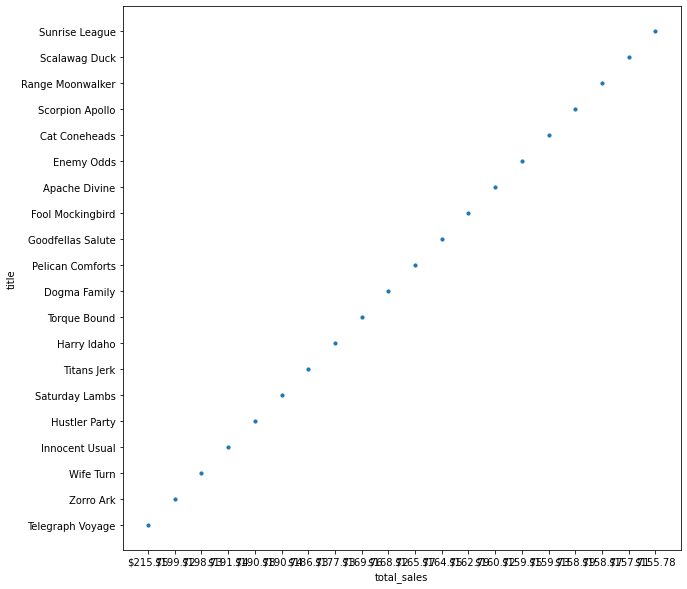

In [70]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x=query_4['total_sales'],y=query_4['title'],s = 10)
plt.xlabel('total_sales')
plt.ylabel('title')
plt.show()

<h1>Sales quantity of top 25 products</h1>
<p> If we then get our average number or our best number and keep pushing the target 
quantity number higher, we will achieve what we need to achieve

In [1]:
query5 = '''select title, count(payment_id)
from film
full outer join inventory
using(film_id)
full outer join rental
using(inventory_id)
full outer join payment
using(rental_id)
group by 1
order by 2 desc
limit 20'''

In [5]:
query_5 = pd.read_sql_query(query5, connection)
query_5

,title,count
0,Scalawag Duck,29
1,Juggler Hardly,29
2,Shock Cabin,29
3,Rugrats Shakespeare,28
4,Dogma Family,28
5,Zorro Ark,28
6,Grit Clockwork,28
7,Rocketeer Mother,28
8,Apache Divine,28
9,Frost Head,28


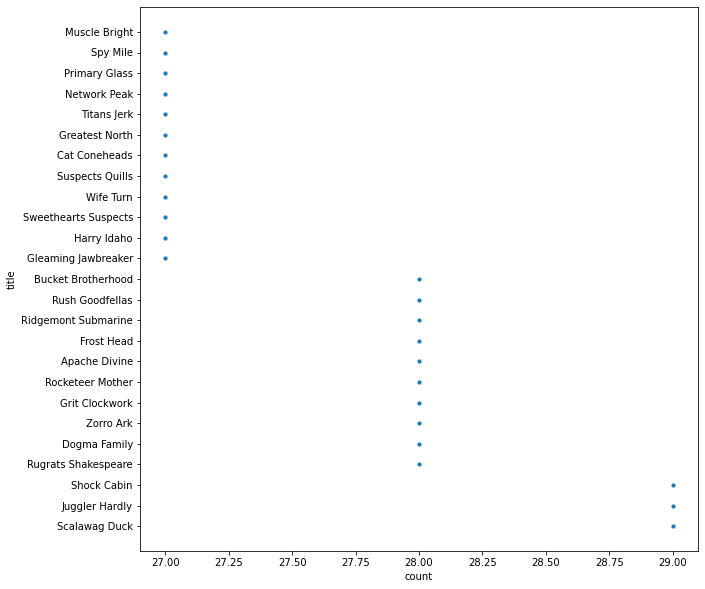

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x=query_5['count'],y=query_5['title'], s = 10)
plt.xlabel('count')
plt.ylabel('title')
plt.show()

<h1> sales by week</h1>
<p> it turns out that certain days of the week are better than others for converting sales prospects into customers.

In [9]:
query6 = '''select date_trunc('week', payment_date)::date||' - '||
       (date_trunc('week', payment_date)+ '6 days')::date as week,
       count(payment_id) as total_sales
from payment
group by 1
order by 1 asc'''

In [10]:
query_6 = pd.read_sql_query(query6, connection)
query_6

,week,total_sales
0,2007-02-12 - 2007-02-18,1202
1,2007-02-19 - 2007-02-25,814
2,2007-02-26 - 2007-03-04,1271
3,2007-03-12 - 2007-03-18,1280
4,2007-03-19 - 2007-03-25,3093
5,2007-04-02 - 2007-04-08,1538
6,2007-04-09 - 2007-04-15,1916
7,2007-04-23 - 2007-04-29,1989
8,2007-04-30 - 2007-05-06,1311
9,2007-05-14 - 2007-05-20,182


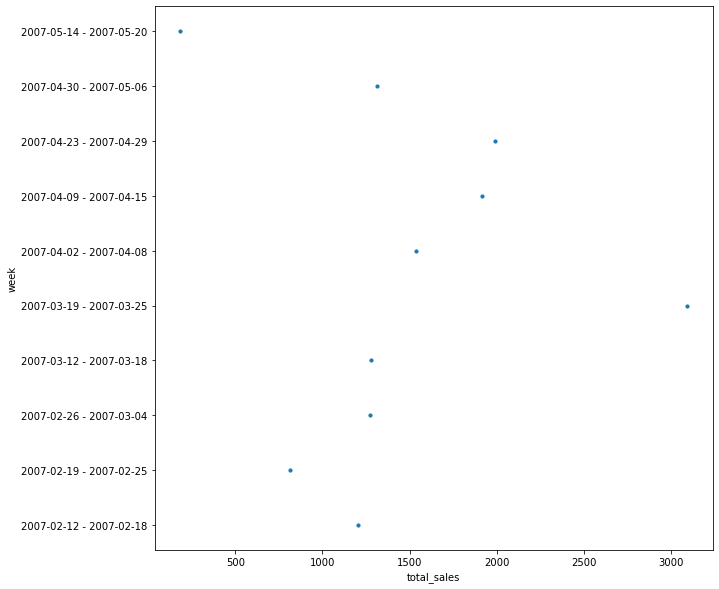

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(x = query_6['total_sales'], y = query_6['week'], s = 10)
plt.xlabel('total_sales')
plt.ylabel('week')
plt.show()

<h1> Rate of sales by month</h1>
<p> A monthly sales report is an important part of assessing how a sales team is functioning and where it can improve.
A good company will have a good product, but without a sales team to attract new clients this product will struggle
to generate revenue.This report allows a manager to avoid spending all their time micromanaging a team, and instead 
focus their efforts on areas of the business where they can achieve maximum value

In [126]:
query7 = '''select distinct to_char(payment_date, 'Mon') as month,
       cast(sum(amount) as money) as total_amt_of_sales, (count(payment_id)/100) as percentage
from payment
group by 1
order by 1 asc;'''

In [127]:
query_7 = pd.read_sql_query(query7, connection)
query_7

,month,total_amt_of_sales,percentage
0,Apr,"$28,559.46",67
1,Feb,"$8,351.84",20
2,Mar,"$23,886.56",56
3,May,$514.18,1


In [128]:
df2 = query_7.copy()
df = pd.DataFrame(df2, columns=['month','total_amt_of_sales', 'percentage'])
# change the special character
df['total_amt_of_sales'] =df['total_amt_of_sales'].replace({r'\$':''}, regex = True)
df['total_amt_of_sales'] =df['total_amt_of_sales'].replace({r'\,':''}, regex = True)
df['total_amt_of_sales'] =df['total_amt_of_sales'].replace({r'\.':''}, regex = True)
# string to numeric
df['total_amt_of_sales'] = df['total_amt_of_sales'].astype(int)
print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
  month  total_amt_of_sales  percentage
0   Apr             2855946          67
1   Feb              835184          20
2   Mar             2388656          56
3   May               51418           1


<AxesSubplot:xlabel='month'>

<Figure size 1296x504 with 0 Axes>

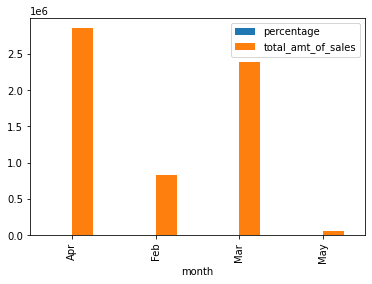

In [129]:
plt.figure(figsize =(18,7))
df.plot(x="month", y=["percentage", "total_amt_of_sales"], kind="bar")
# This bar plot somehow not representing the real graph in my system

<h1> Rate of product returned </h1>
<p> This way we can acknowledge about our returned products that how many returned or not. we will message to those customer
to return the product.

In [28]:
query8 = '''select customer_id , return_date,
       case when return_date is Null Then 'Not_returned'
            else 'Returned'
        end
from rental'''

In [29]:
query_8 = pd.read_sql_query(query8,connection)
query_8

,customer_id,return_date,case
0,459,2005-05-28 19:40:33,Returned
1,408,2005-06-01 22:12:39,Returned
2,333,2005-06-03 01:43:41,Returned
3,222,2005-06-02 04:33:21,Returned
4,549,2005-05-27 01:32:07,Returned
...,...,...,...
16039,74,2005-08-27 18:02:47,Returned
16040,114,2005-08-25 02:48:48,Returned
16041,103,2005-08-31 21:33:07,Returned
16042,393,2005-08-30 01:01:12,Returned


In [51]:
df3 =query_8['case']
a = list(df3)
a


['Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',
 'Returned',

In [58]:
return_count = a.count('Returned')
return_count

15861

In [59]:
not_count = a.count('Not_returned')
not_count


183

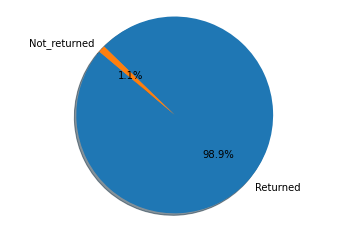

In [64]:
labels = ['Returned', 'Not_returned']
sizes = [return_count,not_count]
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()